In [1]:
from pynq import Overlay
import time
from pynq import Xlnk
import numpy as np

xlnk = Xlnk()
dma_loop = Overlay("./data/4.DMA_Loop.bit")

the len of input_buffer:1048576


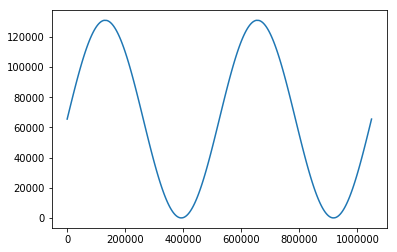

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

data_size = 1024*1024
input_buffer = xlnk.cma_array(shape=(data_size,), dtype=np.uint64)
output_buffer = xlnk.cma_array(shape=(data_size,), dtype=np.uint64)
raw_input = ( (np.sin(np.linspace(0, 4*np.pi, data_size)) + 1) * 65536 ).astype(dtype=np.uint64)

for i in range(data_size):
    input_buffer[i] = raw_input[i]



plt.plot(range(len(input_buffer)), input_buffer)
print("the len of input_buffer:{}".format(len(input_buffer)))


In [3]:
dma_send = dma_loop.axi_dma_0.sendchannel
dma_recv = dma_loop.axi_dma_0.recvchannel

In [12]:
dma_send.transfer(input_buffer)
dma_recv.transfer(output_buffer)
dma_send.wait()
dma_recv.wait()

the len of input_buffer:1048576


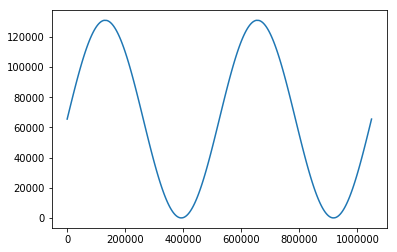

In [17]:
plt.plot(range(len(output_buffer)), output_buffer)
print("the len of input_buffer:{}".format(len(output_buffer)))

In [14]:
print("DMA sendchannel state is idle:{}".format(dma_send.idle))
print("DMA sendchannel state is running:{}".format(dma_send.running))
print("DMA recvchannel state is idle:{}".format(dma_recv.idle))
print("DM1 recvchannel state is running:{}".format(dma_recv.running))

DMA sendchannel state is idle:True
DMA sendchannel state is running:True
DMA recvchannel state is idle:True
DM1 recvchannel state is running:True


In [18]:
start = time.time()
for i in range(128):
    
    dma_send.transfer(input_buffer)
    dma_recv.transfer(output_buffer)
    dma_send.wait()
    dma_recv.wait()

end = time.time()

print("DMA数据发送或接收的速度为{}MB/s".format(1024 / (end - start)))

DMA数据发送或接收的速度为508.3851995927206MB/s
